## This is my Notebook in the Zindi ExploreML FUNAAB Hackathon: Nigerian Cars Price Prediction. Ranked 6th
### Here we will try to predict the car price based on simple information about the car

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
random.seed(42)

In [58]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
s = pd.read_csv('SampleSubmission.csv')
v = pd.read_csv('Variable_Description.csv')

In [59]:
train = train.drop(columns=['ID'])
idd = test.pop('ID')

In [60]:
v

,Column,Description
0,ID,An identifier column with unique values for ea...
1,Make,The maker of a vehicle
2,Model,The model of the of the vehicle
3,Year of manufacture,The year of manufacture of vehicle
4,Colour,The colour of the vehicle
5,Fuel,"The fuel type of the vehicle, whether it runs ..."
6,Transmission,The transmission type of the vehicle
7,Condition,The current condition of the vehicle
8,Mileage,The total distance that has been covered by th...
9,Engine Size,The size of the engine powering the vehicle


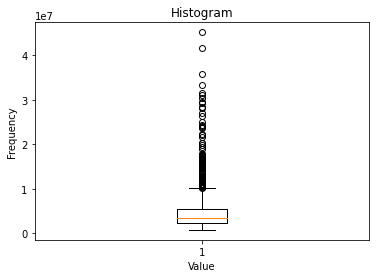

In [61]:
plt.boxplot(train['price'])


plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')


plt.show()

In [62]:
train

,Make,Model,Year of manufacture,Colour,Fuel,Transmission,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,price
0,Honda,Accord,2012,Silver,Petrol,Automatic,Nigerian Used,149429.0,3500.0,Registered,Registered,3120000
1,Toyota,Highlander,2008,Black,Petrol,Automatic,Nigerian Used,165972.0,3500.0,Registered,Registered,4620000
2,Land Rover,Range Rover Sport,2008,Black,Petrol,Automatic,Nigerian Used,114768.0,4400.0,Registered,Imported,2835000
3,Toyota,Camry,2006,Gray,Petrol,Automatic,Nigerian Used,211631.0,3800.0,Registered,Registered,2257500
4,Volvo,XC90,2006,Silver,Petrol,Automatic,Nigerian Used,145648.0,3200.0,Registered,Imported,3150000
...,...,...,...,...,...,...,...,...,...,...,...,...
1350,Honda,City,2019,Black,Petrol,Automatic,Nigerian Used,17646.0,1500.0,Registered,Registered,4800000
1351,Lexus,ES,2002,Silver,Petrol,Automatic,Foreign Used,144162.0,3000.0,Imported,Imported,4680000
1352,Lexus,ES,2010,Red,Petrol,Automatic,Foreign Used,63128.0,3500.0,Imported,Imported,7220000
1353,Lexus,RX 300,1999,Silver,Petrol,Automatic,Foreign Used,152117.0,3000.0,Imported,Imported,3150000


In [63]:
train['Make'].value_counts()

          Toyota                   566
          Honda                    138
          Mercedes-Benz            129
          Lexus                    125
          Ford                      59
          Nissan                    50
          Hyundai                   45
          Acura                     29
          Land Rover                26
          Volkswagen                25
          Kia                       23
          BMW                       21
          Mazda                     19
          Peugeot                   19
          Volvo                     13
          Infiniti                  13
          Mitsubishi                 6
          Dodge                      5
          Jeep                       5
          Pontiac                    5
          Opel                       4
          Chrysler                   4
          GAC                        3
          Chevrolet                  3
          Jaguar                     3
          Saturn         

### Here I tried to reduce the large number of Makes by only leaving well-represented ones and putting the rest in one category

In [64]:
for i in range(1355):#1355
    
    if train['Make'][i] not in ['          Toyota        ','          Lexus        ','          Honda        ','          Mercedes-Benz        ','          Nissan        ','          Ford        ']:
        train['Make'][i] ='          Other        '
for i in range(730):
    
    if test['Make'][i] not in ['          Toyota        ','          Lexus        ','          Honda        ','          Mercedes-Benz        ','          Nissan        ','          Ford        ']:
        test['Make'][i] ='          Other        '

C:\Users\AHMEDB~1\AppData\Local\Temp/ipykernel_5420/2280022951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Make'][i] ='          Other        '
C:\Users\AHMEDB~1\AppData\Local\Temp/ipykernel_5420/2280022951.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Make'][i] ='          Other        '


In [65]:
train['Make'].value_counts()

          Toyota                   566
          Other                    288
          Honda                    138
          Mercedes-Benz            129
          Lexus                    125
          Ford                      59
          Nissan                    50
Name: Make, dtype: int64

In [66]:
train = train.drop(columns = ['Model'])
test = test.drop(columns = ['Model'])

In [67]:
train['Colour'].value_counts()

          Black                 415
          Gray                  230
          Silver                226
          Blue                  140
          Red                   100
          White                  99
          Gold                   62
          Green                  29
          Brown                  22
          Burgandy               11
          Beige                   6
          Off white               6
          Purple                  4
          Ivory                   4
          Matt Black              1
Name: Colour, dtype: int64

### Same thing to colour feature

In [68]:
for i in range(1355):#1355
    
    if train['Colour'][i] not in ['          Blue        ','          White        ','          Red        ','          Black        ','          Silver        ','          Gray        ']:
        train['Colour'][i] ='          Other        '
for i in range(730):
    
    if test['Colour'][i] not in ['          Blue        ','          White        ','          Red        ','          Black        ','          Silver        ','          Gray        ']:
        test['Colour'][i] ='          Other        '

C:\Users\AHMEDB~1\AppData\Local\Temp/ipykernel_5420/1748687406.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Colour'][i] ='          Other        '
C:\Users\AHMEDB~1\AppData\Local\Temp/ipykernel_5420/1748687406.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Colour'][i] ='          Other        '


In [69]:
test['Colour'].value_counts()

          Black             165
          Silver            146
          Gray              132
          Other              83
          Blue               74
          White              67
          Red                63
Name: Colour, dtype: int64

In [70]:
test['Fuel'].value_counts()

Petrol    724
Hybrid      4
Diesel      1
Name: Fuel, dtype: int64

### Here I will try to make a target column in the test set and set it to one but change it to another coefficient
### according to the 'Fuel' and 'Condition' and 'Transmission' features since they are very underrepresented and I thought setting a coefficient like that is better than relying on the model.

In [71]:
test['price'] = np.ones(730)

In [72]:
for i in range(730):
    if (test['Fuel'][i] == 'Diesel'):
        test['price'][i] = 1.5
    if test['Condition'][i] == '          Brand New        ':
        test['price'][i] = 1.5
    if test['Transmission'][i] == 'Manual':
        test['price'][i] = 0.55

C:\Users\AHMEDB~1\AppData\Local\Temp/ipykernel_5420/2924981199.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['price'][i] = 1.5
C:\Users\AHMEDB~1\AppData\Local\Temp/ipykernel_5420/2924981199.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['price'][i] = 0.55
C:\Users\AHMEDB~1\AppData\Local\Temp/ipykernel_5420/2924981199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['price'][i] = 1.5


In [73]:
test['price'].value_counts()

1.00    693
0.55     36
1.50      1
Name: price, dtype: int64

#### Obviously drop those columns too

In [74]:
train = train.drop(columns=['Fuel'])
test = test.drop(columns=['Fuel'])
train = train.drop(columns=['Transmission'])
test = test.drop(columns=['Transmission'])

In [75]:
test['Condition'] = test['Condition'].replace('          Brand New        ', '          Nigerian Used        ')

In [76]:
train

,Make,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,price
0,Honda,2012,Silver,Nigerian Used,149429.0,3500.0,Registered,Registered,3120000
1,Toyota,2008,Black,Nigerian Used,165972.0,3500.0,Registered,Registered,4620000
2,Other,2008,Black,Nigerian Used,114768.0,4400.0,Registered,Imported,2835000
3,Toyota,2006,Gray,Nigerian Used,211631.0,3800.0,Registered,Registered,2257500
4,Other,2006,Silver,Nigerian Used,145648.0,3200.0,Registered,Imported,3150000
...,...,...,...,...,...,...,...,...,...
1350,Honda,2019,Black,Nigerian Used,17646.0,1500.0,Registered,Registered,4800000
1351,Lexus,2002,Silver,Foreign Used,144162.0,3000.0,Imported,Imported,4680000
1352,Lexus,2010,Red,Foreign Used,63128.0,3500.0,Imported,Imported,7220000
1353,Lexus,1999,Silver,Foreign Used,152117.0,3000.0,Imported,Imported,3150000


In [77]:
test[test['Engine Size'].isnull()]

,Make,Year of manufacture,Colour,Condition,Mileage,Engine Size,Selling Condition,Bought Condition,price
76,Other,2016,White,Nigerian Used,110314.0,NaN,Registered,Registered,1.0
257,Toyota,2010,Black,Nigerian Used,125882.0,NaN,Registered,Imported,1.0
313,Toyota,2004,Silver,Nigerian Used,377451.0,NaN,Registered,Registered,1.0
346,Toyota,2003,Silver,Nigerian Used,183434.0,NaN,Registered,Registered,1.0
385,Ford,2004,White,Nigerian Used,259037.0,NaN,Registered,Imported,1.0


In [78]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean') #for numeric values 
imp = SimpleImputer(strategy='most_frequent') # for categorical values

imputer.fit(train[['Mileage']])
imp.fit(train[['Engine Size']])

train[['Mileage']] = imputer.transform(train[['Mileage']])
test[['Mileage']] = imputer.transform(test[['Mileage']])
train[['Engine Size']] = imp.transform(train[['Engine Size']])
test[['Engine Size']] = imp.transform(test[['Engine Size']])

In [79]:
train['Bought Condition'].value_counts()

          Imported              687
          Registered            630
          Brand new              38
Name: Bought Condition, dtype: int64

In [80]:
test['Selling Condition'] = test['Condition'].replace('          Brand New        ', '          Imported        ')
train['Selling Condition'] = train['Condition'].replace('          Brand New        ', '          Imported        ')
train['Bought Condition'] = train['Condition'].replace('          Brand New        ', '          Imported        ')
test['Bought Condition'] = test['Condition'].replace('          Brand New        ', '          Imported        ')

### one hot encoding for categorical values

In [81]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [82]:
train

,Year of manufacture,Mileage,Engine Size,price,Make_ Ford,Make_ Honda,Make_ Lexus,Make_ Mercedes-Benz,Make_ Nissan,Make_ Other,...,Colour_ Other,Colour_ Red,Colour_ Silver,Colour_ White,Condition_ Foreign Used,Condition_ Nigerian Used,Selling Condition_ Foreign Used,Selling Condition_ Nigerian Used,Bought Condition_ Foreign Used,Bought Condition_ Nigerian Used
0,2012,149429.0,3500.0,3120000,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
1,2008,165972.0,3500.0,4620000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,2008,114768.0,4400.0,2835000,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,2006,211631.0,3800.0,2257500,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,2006,145648.0,3200.0,3150000,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,2019,17646.0,1500.0,4800000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1351,2002,144162.0,3000.0,4680000,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1352,2010,63128.0,3500.0,7220000,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1353,1999,152117.0,3000.0,3150000,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [83]:
train['Year of manufacture']= train['Year of manufacture'] -1990
test['Year of manufacture']= test['Year of manufacture'] -1990

#to get it down to 0-23 but that's probably useless

In [84]:
train

,Year of manufacture,Mileage,Engine Size,price,Make_ Ford,Make_ Honda,Make_ Lexus,Make_ Mercedes-Benz,Make_ Nissan,Make_ Other,...,Colour_ Other,Colour_ Red,Colour_ Silver,Colour_ White,Condition_ Foreign Used,Condition_ Nigerian Used,Selling Condition_ Foreign Used,Selling Condition_ Nigerian Used,Bought Condition_ Foreign Used,Bought Condition_ Nigerian Used
0,22,149429.0,3500.0,3120000,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,1
1,18,165972.0,3500.0,4620000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
2,18,114768.0,4400.0,2835000,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
3,16,211631.0,3800.0,2257500,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
4,16,145648.0,3200.0,3150000,0,0,0,0,0,1,...,0,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,29,17646.0,1500.0,4800000,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1351,12,144162.0,3000.0,4680000,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0
1352,20,63128.0,3500.0,7220000,0,0,1,0,0,0,...,0,1,0,0,1,0,1,0,1,0
1353,9,152117.0,3000.0,3150000,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,1,0


In [85]:
Y = train.pop('price')
pr = test.pop('price')

### StandardScaler on the numeric features

In [86]:
from sklearn.preprocessing import StandardScaler


columns_to_scale = ['Mileage', 'Engine Size']


scaler = StandardScaler()


train[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])
test[columns_to_scale] = scaler.transform(test[columns_to_scale])

In [89]:
X=train
X.columns

Index(['Year of manufacture', 'Mileage', 'Engine Size',
       'Make_          Ford        ', 'Make_          Honda        ',
       'Make_          Lexus        ', 'Make_          Mercedes-Benz        ',
       'Make_          Nissan        ', 'Make_          Other        ',
       'Make_          Toyota        ', 'Colour_          Black        ',
       'Colour_          Blue        ', 'Colour_          Gray        ',
       'Colour_          Other        ', 'Colour_          Red        ',
       'Colour_          Silver        ', 'Colour_          White        ',
       'Condition_          Foreign Used        ',
       'Condition_          Nigerian Used        ',
       'Selling Condition_          Foreign Used        ',
       'Selling Condition_          Nigerian Used        ',
       'Bought Condition_          Foreign Used        ',
       'Bought Condition_          Nigerian Used        '],
      dtype='object')

In [90]:
test.columns

Index(['Year of manufacture', 'Mileage', 'Engine Size',
       'Make_          Ford        ', 'Make_          Honda        ',
       'Make_          Lexus        ', 'Make_          Mercedes-Benz        ',
       'Make_          Nissan        ', 'Make_          Other        ',
       'Make_          Toyota        ', 'Colour_          Black        ',
       'Colour_          Blue        ', 'Colour_          Gray        ',
       'Colour_          Other        ', 'Colour_          Red        ',
       'Colour_          Silver        ', 'Colour_          White        ',
       'Condition_          Foreign Used        ',
       'Condition_          Nigerian Used        ',
       'Selling Condition_          Foreign Used        ',
       'Selling Condition_          Nigerian Used        ',
       'Bought Condition_          Foreign Used        ',
       'Bought Condition_          Nigerian Used        '],
      dtype='object')

### After that I used random sampled to make the dataset much bigger

In [91]:
from imblearn.over_sampling import RandomOverSampler


oversampler = RandomOverSampler(random_state = 42)


X, Y = oversampler.fit_resample(X, Y)

In [92]:
help(RandomOverSampler)

Help on class RandomOverSampler in module imblearn.over_sampling._random_over_sampler:

class RandomOverSampler(imblearn.over_sampling.base.BaseOverSampler)
 |  RandomOverSampler(*, sampling_strategy='auto', random_state=None)
 |  
 |  Class to perform random over-sampling.
 |  
 |  Object to over-sample the minority class(es) by picking samples at random
 |  with replacement.
 |  
 |  Read more in the :ref:`User Guide <random_over_sampler>`.
 |  
 |  Parameters
 |  ----------
 |  sampling_strategy : float, str, dict or callable, default='auto'
 |      Sampling information to resample the data set.
 |  
 |      - When ``float``, it corresponds to the desired ratio of the number of
 |        samples in the minority class over the number of samples in the
 |        majority class after resampling. Therefore, the ratio is expressed as
 |        :math:`\alpha_{os} = N_{rm} / N_{M}` where :math:`N_{rm}` is the
 |        number of samples in the minority class after resampling and
 |        

In [93]:
Y.value_counts()

3120000     36
1462500     36
1068750     36
45150000    36
3262500     36
            ..
4500000     36
3050000     36
5720000     36
6645937     36
7220000     36
Name: price, Length: 412, dtype: int64

### Random Forest and cross validation

In [94]:
from sklearn.model_selection import cross_val_score
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=900, max_depth= 41,min_samples_split=2,min_samples_leaf=1, random_state=42)


scores = cross_val_score(rf, X, Y, cv=5, scoring='neg_mean_squared_error')


rmse_scores = np.sqrt(-scores)

print("RMSE scores:", rmse_scores)


print("Average RMSE score:", np.mean(rmse_scores))

RMSE scores: [1103987.61825253  522787.04632295  774028.17204365 1063559.94012952
 2537791.08454975]
Average RMSE score: 1200430.7722596782


In [95]:
rf.fit(X,Y)

RandomForestRegressor(max_depth=41, n_estimators=900, random_state=42)

In [96]:
y_pred = rf.predict(test)

In [97]:
y_pred

array([ 8728788.33333333,  1333479.72222222,  6024658.24555556,
        1254702.22222222,  2686610.55555556,  2523764.53005161,
        1866944.86449864,  8844415.12666667,  9004077.67333333,
        4961110.41666667,  3883989.16666667,  2565359.07777778,
       39221208.33333334,  5190678.88888889,  5139891.10666667,
        1567446.99777778,  4699008.44444444,  1728350.        ,
        3845869.14222222,  3002670.55555556,  1997733.33333333,
        1998398.88888889, 14431558.88888889,  6717481.11111111,
        1620127.22222222,  3580768.88888889,  1645086.66666667,
        5325272.22222222,  7291242.05555556,  2466436.11111111,
        2516131.11111111,  1639871.11111111,  3028618.33333333,
        9132411.11111111,  3931855.55555556,  2810893.7037037 ,
        8211061.11111111, 14209020.        ,  7711145.55555556,
        5793822.05555556,  3255643.38888889,  1900350.55555556,
        3073052.77777778,  2127711.        , 13745279.16666667,
        3217401.11111111,  2128288.88888

In [98]:
y_pred =y_pred * (pr) # pr is the price coefficient
y_pred

0      8.728788e+06
1      1.333480e+06
2      6.024658e+06
3      1.254702e+06
4      2.686611e+06
           ...     
725    3.569600e+06
726    3.340183e+06
727    5.129096e+06
728    5.248414e+06
729    2.045700e+06
Name: price, Length: 730, dtype: float64

In [99]:
sub = pd.DataFrame(y_pred, columns=['price'])
sub.insert(0,'ID',idd)
sub

,ID,price
0,ID_CCK7xp,8.728788e+06
1,ID_69RKZr,1.333480e+06
2,ID_6bNQFH,6.024658e+06
3,ID_OxjBL4,1.254702e+06
4,ID_Bjl4Bg,2.686611e+06
...,...,...
725,ID_VqYf1W,3.569600e+06
726,ID_ZH8EtE,3.340183e+06
727,ID_HIkQGl,5.129096e+06
728,ID_W95SH9,5.248414e+06


In [100]:
sub.to_csv('smoter.csv',index=False)